In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("..")

In [49]:
dataPath = "../data/L1_pump_spectrum.csv"
df = pd.read_csv(dataPath, header=None, skiprows=-1)
df.columns = ["Wavelength (nm)", "Intensity"]

wavelength, intensity = df.loc[:, "Wavelength (nm)"].values, df.loc[:, "Intensity"].values
intensity = (intensity - intensity.min())/(intensity.max() - intensity.min())

from utils import physics

field = np.sqrt(intensity)

time, intensity_time = physics.temporal_profile(
    frequency * 10**12, 
    field, 
    phase = np.zeros_like(frequency), 
    npoints_pad = int(6e4)) 

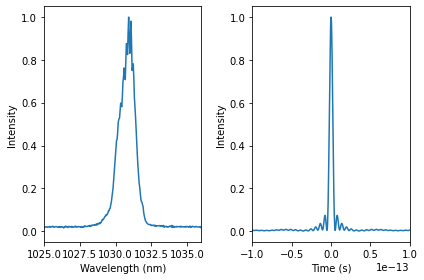

In [53]:
fig, ax = plt.subplots(ncols = 2)

ax[0].plot(frequency, intensity)
ax[0].set_xlim(left = 1025, right = 1036)
ax[0].set_xlabel("Wavelength (nm)"); ax[0].set_ylabel("Intensity")

ax[1].plot(time, intensity_time)
ax[1].set_xlim(left = -0.01e-11, right = 0.01e-11)
ax[1].set_xlabel("Time (s)"); ax[1].set_ylabel("Intensity")

fig.tight_layout()

plt.show()